In [ ]:
%autosave 30

Autosaving every 30 seconds


In [ ]:
#install 
import numpy as np
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from  scipy.stats import mode

In [ ]:
from matplotlib import pyplot
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#import folder dari google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##PREPROCESSING DATA

In [ ]:
#import data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hotel_booking.csv", sep=";")
data.head(6)

,cancel,harikerja,tahunkedatangan,bulankedatangan,adults,children,meal,country,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,hotel
0,0,342,2015,7,2,0.0,BB,PRT,0,0,C,C,3,No Deposit,Transient,0.0,0
1,0,737,2015,7,2,0.0,BB,PRT,0,0,C,C,4,No Deposit,Transient,0.0,0
2,0,7,2015,7,1,0.0,BB,GBR,0,0,A,C,0,No Deposit,Transient,75.0,0
3,0,13,2015,7,1,0.0,BB,GBR,0,0,A,A,0,No Deposit,Transient,75.0,0
4,0,14,2015,7,2,0.0,BB,GBR,0,0,A,A,0,No Deposit,Transient,98.0,0
5,0,14,2015,7,2,0.0,BB,GBR,0,0,A,A,0,No Deposit,Transient,98.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   cancel                          119390 non-null  int64  
 1   harikerja                       119390 non-null  int64  
 2   tahunkedatangan                 119390 non-null  int64  
 3   bulankedatangan                 119390 non-null  int64  
 4   adults                          119390 non-null  int64  
 5   children                        119386 non-null  float64
 6   meal                            119390 non-null  object 
 7   country                         118902 non-null  object 
 8   previous_cancellations          119390 non-null  int64  
 9   previous_bookings_not_canceled  119390 non-null  int64  
 10  reserved_room_type              119390 non-null  object 
 11  assigned_room_type              119390 non-null  object 
 12  booking_changes 

In [ ]:
data.describe()

,cancel,harikerja,tahunkedatangan,bulankedatangan,adults,children,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,hotel
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,6.552483,1.856403,0.103890,0.087118,0.137097,0.221124,101.831122,0.664461
std,0.482918,106.863097,0.707476,3.090619,0.579261,0.398561,0.844336,1.497437,0.652306,50.535790,0.472181
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,0.000000,18.000000,2016.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000
50%,0.000000,69.000000,2016.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,94.575000,1.000000
75%,1.000000,160.000000,2017.000000,9.000000,2.000000,0.000000,0.000000,0.000000,0.000000,126.000000,1.000000
max,1.000000,737.000000,2017.000000,12.000000,55.000000,10.000000,26.000000,72.000000,21.000000,5400.000000,1.000000


In [ ]:
np.sum(data.isnull())

cancel                              0
harikerja                           0
tahunkedatangan                     0
bulankedatangan                     0
adults                              0
children                            4
meal                                0
country                           488
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
customer_type                       0
adr                                 0
hotel                               0
dtype: int64

In [ ]:
#persentase missing value
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing', inplace=True)
print(missing_value_data)

                                percent_missing
cancel                                 0.000000
customer_type                          0.000000
deposit_type                           0.000000
booking_changes                        0.000000
assigned_room_type                     0.000000
reserved_room_type                     0.000000
previous_bookings_not_canceled         0.000000
adr                                    0.000000
previous_cancellations                 0.000000
meal                                   0.000000
adults                                 0.000000
bulankedatangan                        0.000000
tahunkedatangan                        0.000000
harikerja                              0.000000
hotel                                  0.000000
children                               0.003350
country                                0.408744


In [ ]:
st.mode(data['country']) 

'PRT'

In [ ]:
#Imputasi Missing Value
data['country']=data['country'].fillna('PRT')
data['children']=data['children'].fillna(data['children'].median())
np.sum(data.isnull())

cancel                            0
harikerja                         0
tahunkedatangan                   0
bulankedatangan                   0
adults                            0
children                          0
meal                              0
country                           0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
hotel                             0
dtype: int64

In [ ]:
#Data outlier
from scipy import stats
z = np.abs(stats.zscore(data._get_numeric_data()))
z

#Mendapatkan data yang tidak outlier pada semua variabel
data1 = data[(z<3).all(axis=1)]
data1

,cancel,harikerja,tahunkedatangan,bulankedatangan,adults,children,meal,country,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,hotel
2,0,7,2015,7,1,0.0,BB,GBR,0,0,A,C,0,No Deposit,Transient,75.00,0
3,0,13,2015,7,1,0.0,BB,GBR,0,0,A,A,0,No Deposit,Transient,75.00,0
4,0,14,2015,7,2,0.0,BB,GBR,0,0,A,A,0,No Deposit,Transient,98.00,0
5,0,14,2015,7,2,0.0,BB,GBR,0,0,A,A,0,No Deposit,Transient,98.00,0
6,0,0,2015,7,2,0.0,BB,PRT,0,0,C,C,0,No Deposit,Transient,107.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,2,0.0,BB,BEL,0,0,A,A,0,No Deposit,Transient,96.14,1
119386,0,102,2017,8,3,0.0,BB,FRA,0,0,E,E,0,No Deposit,Transient,225.43,1
119387,0,34,2017,8,2,0.0,BB,DEU,0,0,D,D,0,No Deposit,Transient,157.71,1
119388,0,109,2017,8,2,0.0,BB,GBR,0,0,A,A,0,No Deposit,Transient,104.40,1


In [ ]:
#Deskripsi data bersih
data1.describe()

,cancel,harikerja,tahunkedatangan,bulankedatangan,adults,children,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,hotel
count,110746.000000,110746.000000,110746.000000,110746.000000,110746.000000,110746.000000,110746.000000,110746.000000,110746.000000,110746.000000,110746.000000
mean,0.368374,100.296932,2016.142786,6.534620,1.858017,0.040534,0.052535,0.039514,0.169839,98.918369,0.670363
std,0.482366,98.779398,0.710042,3.100994,0.476050,0.197209,0.225038,0.297188,0.452388,42.733399,0.470084
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,0.000000,18.000000,2016.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000
50%,0.000000,69.000000,2016.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,93.600000,1.000000
75%,1.000000,158.000000,2017.000000,9.000000,2.000000,0.000000,0.000000,0.000000,0.000000,122.500000,1.000000
max,1.000000,424.000000,2017.000000,12.000000,3.000000,1.000000,2.000000,4.000000,2.000000,253.330000,1.000000


##VISUALIZATION

Text(0, 0.5, 'Cancel or No cancel')

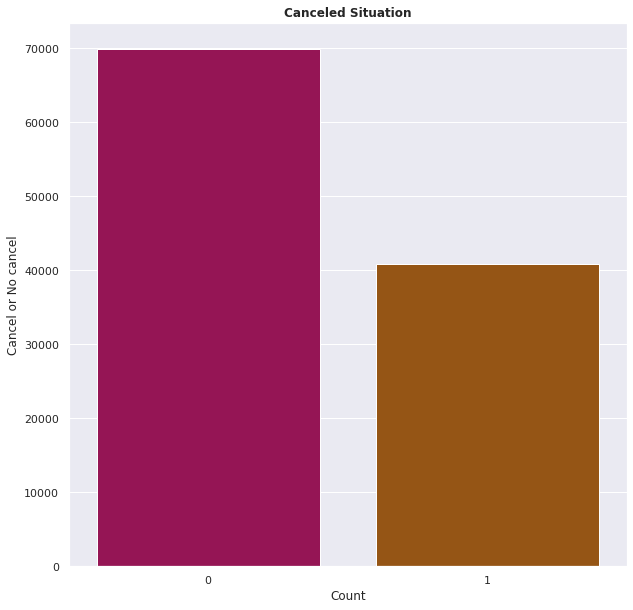

In [ ]:
# Jumlah Cancel
plt.figure(figsize=(10,10))
sns.countplot(x='cancel', data= data1, palette="brg", orient = 'v')
plt.title('Canceled Situation', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cancel or No cancel', fontsize=12)

Text(0, 0.5, 'Count')

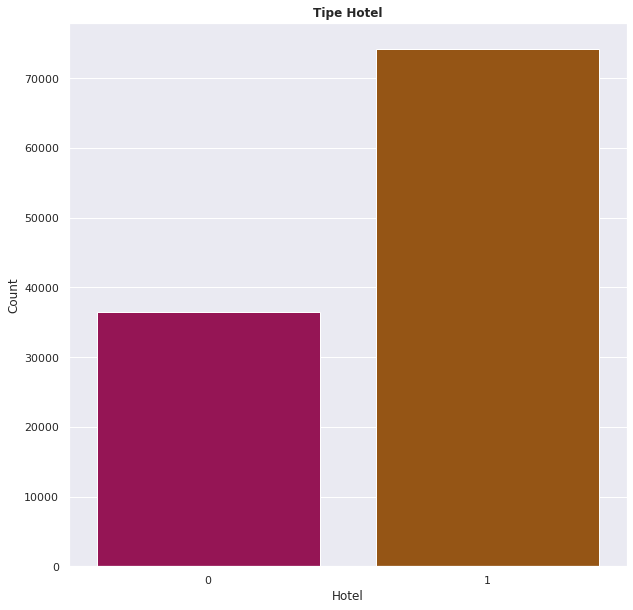

In [ ]:
# Hotel types details
plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = data1, palette="brg")
plt.title('Tipe Hotel', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

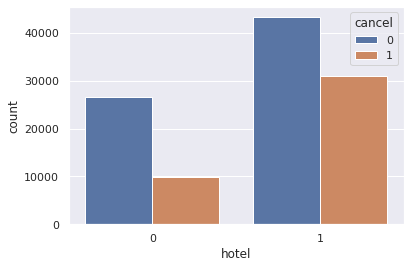

In [ ]:
sns.countplot(data=data1, x = 'hotel', hue='cancel')

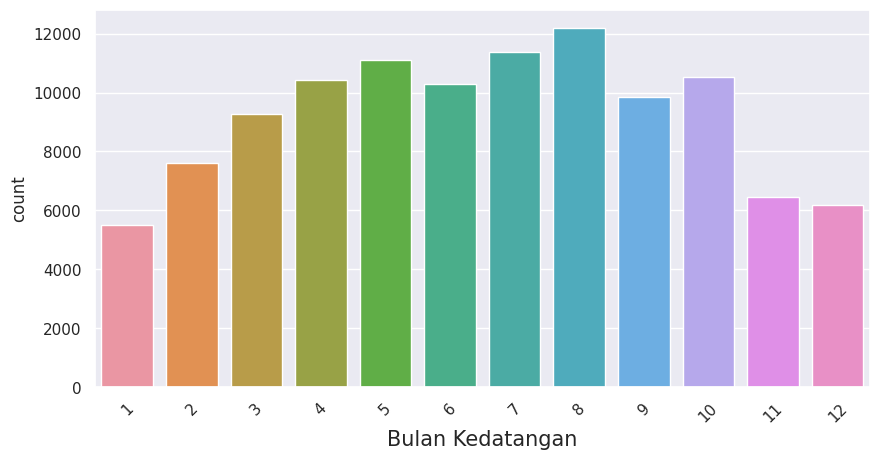

In [ ]:
fig = plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(data=data1, x = 'bulankedatangan')
plt.xlabel('Bulan Kedatangan', fontsize=15)
plt.xticks(rotation=45,fontsize=11);

In [ ]:
df = data1._get_numeric_data()
df

,cancel,harikerja,tahunkedatangan,bulankedatangan,adults,children,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,hotel
2,0,7,2015,7,1,0.0,0,0,0,75.00,0
3,0,13,2015,7,1,0.0,0,0,0,75.00,0
4,0,14,2015,7,2,0.0,0,0,0,98.00,0
5,0,14,2015,7,2,0.0,0,0,0,98.00,0
6,0,0,2015,7,2,0.0,0,0,0,107.00,0
...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,2,0.0,0,0,0,96.14,1
119386,0,102,2017,8,3,0.0,0,0,0,225.43,1
119387,0,34,2017,8,2,0.0,0,0,0,157.71,1
119388,0,109,2017,8,2,0.0,0,0,0,104.40,1


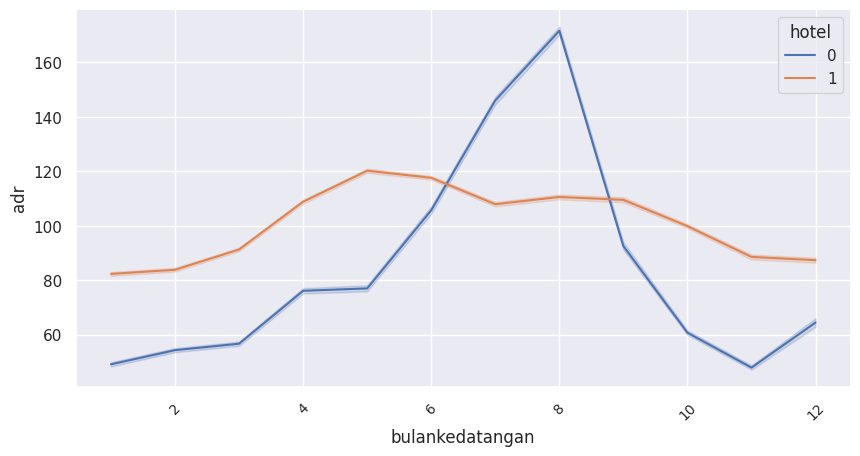

In [ ]:
fig = plt.figure(figsize=(10,5),dpi=100)

sns.lineplot(data=data1, x= 'bulankedatangan', y = 'adr', hue='hotel',)
plt.xticks(rotation=45,fontsize=10);

Text(0, 0.5, 'Lead Time')

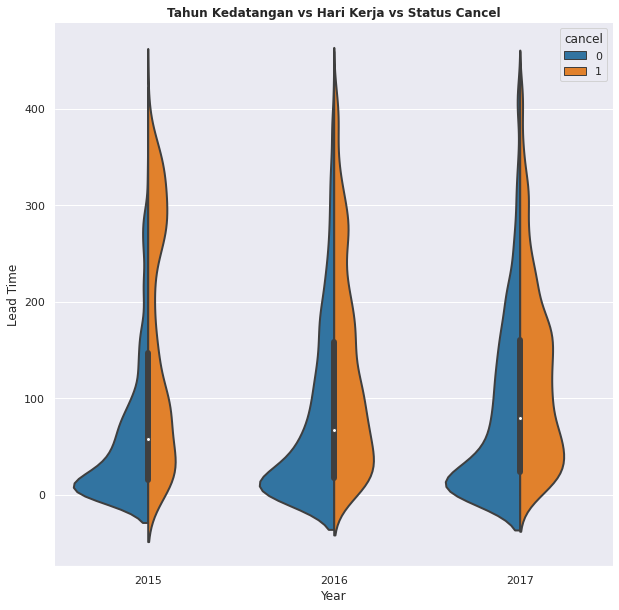

In [ ]:
# `arrival_date_year` vs `lead_time` vs `is_canceled` exploration with violin plot
plt.figure(figsize=(10,10))
sns.violinplot(x='tahunkedatangan', y ='harikerja', hue="cancel", data=data1, palette="tab10", bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
sns.despine(left=True)
plt.title('Tahun Kedatangan vs Hari Kerja vs Status Cancel', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

Text(0, 0.5, 'Jumlah')

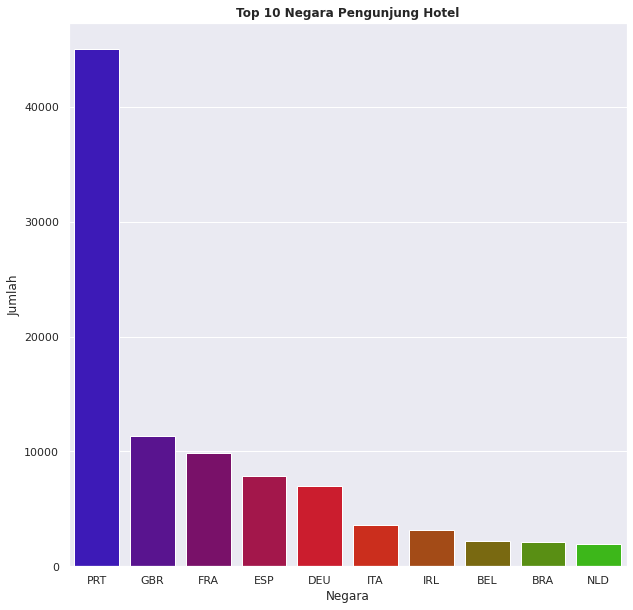

In [ ]:
# Create Top 10 Country of Origin graph
plt.figure(figsize=(10,10))
sns.countplot(x='country', data=data1, 
              order=pd.value_counts(data1['country']).iloc[:10].index, palette="brg")
plt.title('Top 10 Negara Pengunjung Hotel', weight='bold')
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

In [ ]:
#Asal Kedatangan Pengunjung
country_wise_guests = data1[data1['cancel'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['Negara', 'Tidak ada pengunjung']
country_wise_guests

,Negara,Tidak ada pengunjung
0,PRT,19456
1,GBR,9043
2,FRA,8064
3,ESP,5927
4,DEU,5862
...,...,...
156,BHS,1
157,MAC,1
158,BFA,1
159,TMP,1


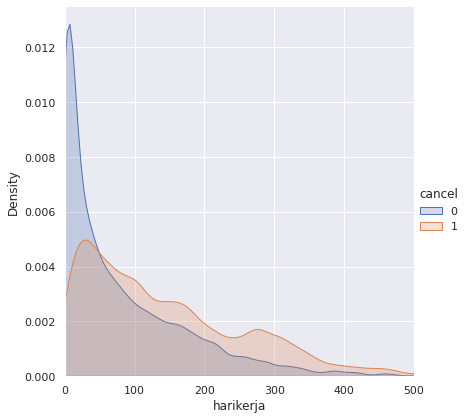

In [ ]:
(sns.FacetGrid(data, hue = 'cancel',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'harikerja', shade = True)
    .add_legend());

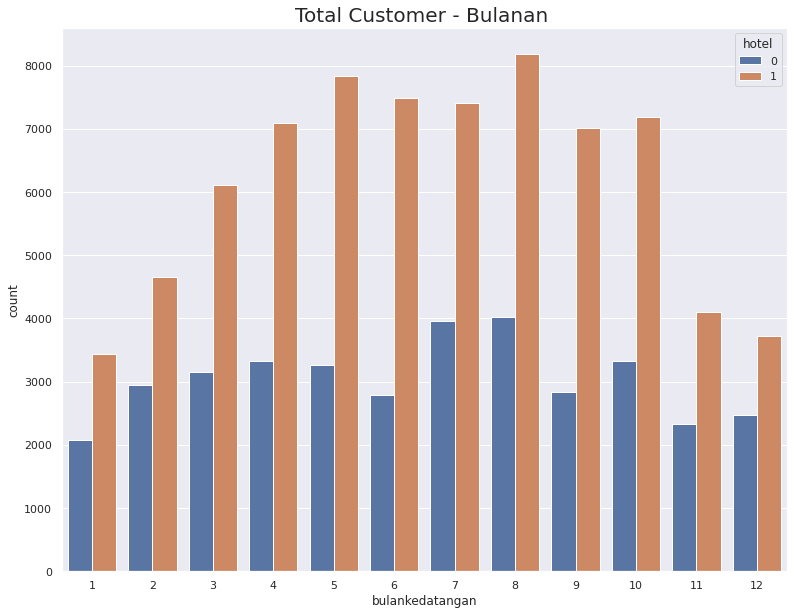

In [ ]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customer - Bulanan ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "bulankedatangan", hue = 'hotel', data = data1)

In [ ]:
cor_data1 = data1.copy()
cor=cor_data1.corr()
cor

,cancel,harikerja,tahunkedatangan,bulankedatangan,adults,children,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,hotel
cancel,1.000000,0.283307,0.016079,0.006831,0.056048,-0.019709,0.292627,-0.089193,-0.161081,0.057050,0.143315
harikerja,0.283307,1.000000,0.020165,0.132452,0.134902,-0.020168,0.250668,-0.105627,-0.000436,-0.042438,0.062843
tahunkedatangan,0.016079,0.020165,1.000000,-0.537269,0.050040,0.045787,-0.283616,0.026666,0.022021,0.207644,0.036618
bulankedatangan,0.006831,0.132452,-0.537269,1.000000,0.024781,0.004018,0.090132,-0.032799,0.004946,0.082037,0.004447
adults,0.056048,0.134902,0.050040,0.024781,1.000000,0.070536,-0.015757,-0.155394,-0.070795,0.289538,0.010846
children,-0.019709,-0.020168,0.045787,0.004018,0.070536,1.000000,-0.042083,-0.018392,0.058561,0.170048,-0.008597
previous_cancellations,0.292627,0.250668,-0.283616,0.090132,-0.015757,-0.042083,1.000000,0.031339,-0.071501,-0.115586,0.093111
previous_bookings_not_canceled,-0.089193,-0.105627,0.026666,-0.032799,-0.155394,-0.018392,0.031339,1.000000,0.020806,-0.099547,-0.083606
booking_changes,-0.161081,-0.000436,0.022021,0.004946,-0.070795,0.058561,-0.071501,0.020806,1.000000,0.010633,-0.073494
adr,0.057050,-0.042438,0.207644,0.082037,0.289538,0.170048,-0.115586,-0.099547,0.010633,1.000000,0.163856


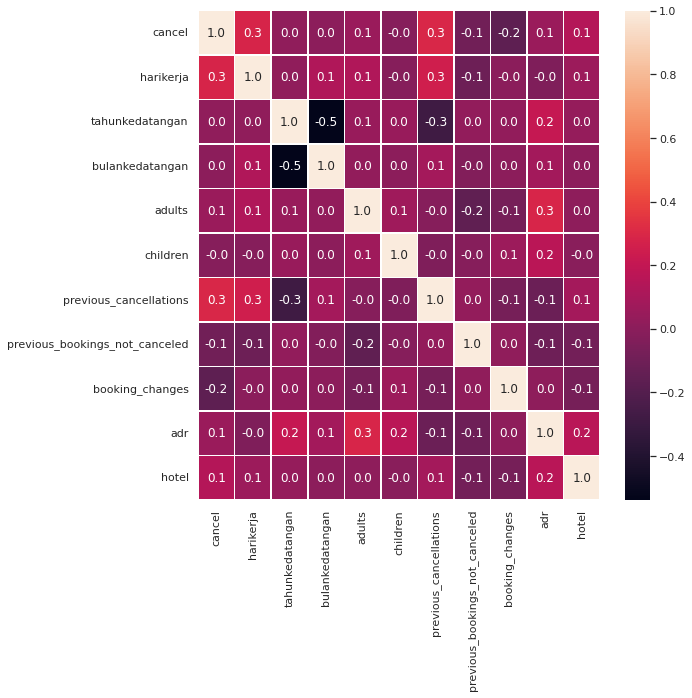

In [ ]:
f,ax=plt.subplots(figsize=(9,9)) #ukuran
sns.heatmap(cor,annot=True,linewidths=0.5,fmt='.1f',ax=ax)
plt.show()

##Feature Selection

In [ ]:
#Using Label Encoder method for categorical features
labelencoder = LabelEncoder()
data1['meal'] = labelencoder.fit_transform(data1['meal'])
data1['country'] = labelencoder.fit_transform(data1['country'])
data1['reserved_room_type'] = labelencoder.fit_transform(data1['reserved_room_type'])
data1['assigned_room_type'] = labelencoder.fit_transform(data1['assigned_room_type'])
data1['deposit_type'] = labelencoder.fit_transform(data1['deposit_type'])
data1['customer_type'] = labelencoder.fit_transform(data1['customer_type'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
data1

,cancel,harikerja,tahunkedatangan,bulankedatangan,adults,children,meal,country,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,hotel
2,0,7,2015,7,1,0.0,0,55,0,0,0,2,0,0,2,75.00,0
3,0,13,2015,7,1,0.0,0,55,0,0,0,0,0,0,2,75.00,0
4,0,14,2015,7,2,0.0,0,55,0,0,0,0,0,0,2,98.00,0
5,0,14,2015,7,2,0.0,0,55,0,0,0,0,0,0,2,98.00,0
6,0,0,2015,7,2,0.0,0,131,0,0,2,2,0,0,2,107.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,2,0.0,0,14,0,0,0,0,0,0,2,96.14,1
119386,0,102,2017,8,3,0.0,0,52,0,0,4,4,0,0,2,225.43,1
119387,0,34,2017,8,2,0.0,0,41,0,0,3,3,0,0,2,157.71,1
119388,0,109,2017,8,2,0.0,0,55,0,0,0,0,0,0,2,104.40,1


In [ ]:
x = data1.drop("cancel",1)
y = data1['cancel']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#feature selection using f_classif
fs = SelectKBest(score_func=f_classif, k=3)
fit = fs.fit(x,y)

#create df for scores
dfscores = pd.DataFrame(fit.scores_)

#create df for column names
dfcolumns = pd.DataFrame(df.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_ANOVA'] 

#print  best features
print(featureScores.nlargest(18,'Score_ANOVA'))

                  Selected_columns   Score_ANOVA
12                             NaN  31115.503495
7   previous_bookings_not_canceled  10371.164083
0                           cancel   9664.319226
6           previous_cancellations   9269.740603
10                           hotel   4412.150592
11                             NaN   2950.045120
15                             NaN   2322.288334
8                  booking_changes    888.086516
9                              adr    656.029952
13                             NaN    473.058274
14                             NaN    361.615001
3                  bulankedatangan    348.983133
4                           adults     43.035364
1                        harikerja     28.639933
5                         children      6.520258
2                  tahunkedatangan      5.168486


In [ ]:
datachi=data1.drop(["adr","harikerja","adults","children","tahunkedatangan","bulankedatangan","booking_changes"],axis=1)
datachi

,cancel,meal,country,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,hotel
2,0,0,55,0,0,0,2,0,2,0
3,0,0,55,0,0,0,0,0,2,0
4,0,0,55,0,0,0,0,0,2,0
5,0,0,55,0,0,0,0,0,2,0
6,0,0,131,0,0,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...
119385,0,0,14,0,0,0,0,0,2,1
119386,0,0,52,0,0,4,4,0,2,1
119387,0,0,41,0,0,3,3,0,2,1
119388,0,0,55,0,0,0,0,0,2,1


In [ ]:
#Feature Selection Variabel Kategori
from sklearn.feature_selection import SelectKBest, f_classif, chi2
X = datachi.iloc[:,1:10]
X = pd.get_dummies(X)
y = datachi.iloc[:,0]
y = pd.get_dummies(y)

#feature selection using chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_chi2'] 
#print 5 best features
print(featureScores.nlargest(10,'Score_chi2'))

                 Selected_columns     Score_chi2
1                         country  185683.537904
6                    deposit_type   21827.353950
5              assigned_room_type   10782.667841
2          previous_cancellations    9141.525977
3  previous_bookings_not_canceled    1969.264765
4              reserved_room_type    1798.833312
8                           hotel     749.803139
7                   customer_type      75.503963
0                            meal      16.566382


##CLASSIFICATION


In [ ]:
from sklearn import svm
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [ ]:
y = data1["cancel"]
x = data1.drop(["cancel"], axis=1)
x

,harikerja,tahunkedatangan,bulankedatangan,adults,children,meal,country,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,hotel
2,7,2015,7,1,0.0,0,55,0,0,0,2,0,0,2,75.00,0
3,13,2015,7,1,0.0,0,55,0,0,0,0,0,0,2,75.00,0
4,14,2015,7,2,0.0,0,55,0,0,0,0,0,0,2,98.00,0
5,14,2015,7,2,0.0,0,55,0,0,0,0,0,0,2,98.00,0
6,0,2015,7,2,0.0,0,131,0,0,2,2,0,0,2,107.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,8,2,0.0,0,14,0,0,0,0,0,0,2,96.14,1
119386,102,2017,8,3,0.0,0,52,0,0,4,4,0,0,2,225.43,1
119387,34,2017,8,2,0.0,0,41,0,0,3,3,0,0,2,157.71,1
119388,109,2017,8,2,0.0,0,55,0,0,0,0,0,0,2,104.40,1


In [ ]:
pip install fsspec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
from sklearn.model_selection import KFold
skf = sklearn.model_selection.KFold(n_splits=5,shuffle=True)
fold_no = 1
for train_index, test_index in skf.split(x, y):
    print("FOLD ",fold_no)
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train = x.iloc[train_index, :]
    y_train = y.iloc[train_index]
    X_test = x.iloc[test_index, :]
    y_test = y.iloc[test_index]
    X_train.to_csv('D://DATMIN EAS/kfold/' + 'X_train_fold_' + str(fold_no) + '.csv',index=False)
    X_test.to_csv('D://DATMIN EAS/kfold/' + 'X_test_fold_' + str(fold_no) + '.csv',index=False)
    y_train.to_csv('D://DATMIN EAS/kfold/' + 'y_train_fold_' + str(fold_no) + '.csv',index=False)
    y_test.to_csv('D://DATMIN EAS/kfold/' + 'y_test_fold_' + str(fold_no) + '.csv',index=False)
    fold_no += 1

FOLD  1
TRAIN: [     0      1      2 ... 110743 110744 110745] TEST: [     4      5      8 ... 110733 110734 110739]
FOLD  2
TRAIN: [     0      1      3 ... 110743 110744 110745] TEST: [     2     13     22 ... 110704 110725 110741]
FOLD  3
TRAIN: [     1      2      4 ... 110743 110744 110745] TEST: [     0      3      9 ... 110732 110736 110742]
FOLD  4
TRAIN: [     0      2      3 ... 110741 110742 110745] TEST: [     1      6      7 ... 110738 110743 110744]
FOLD  5
TRAIN: [     0      1      2 ... 110742 110743 110744] TEST: [    11     12     15 ... 110737 110740 110745]


In [ ]:
#Data CV Kfold
#Fold1
xtrainfold1 = pd.read_csv('D://DATMIN EAS/kfold/X_train_fold_1.csv')
xtestfold1 = pd.read_csv('D://DATMIN EAS/kfold/X_test_fold_1.csv')
ytrainfold1 = pd.read_csv('D://DATMIN EAS/kfold/y_train_fold_1.csv')
ytestfold1 = pd.read_csv('D://DATMIN EAS/kfold/y_test_fold_1.csv')

#Fold2
xtrainfold2 = pd.read_csv('D://DATMIN EAS/kfold/X_train_fold_2.csv')
xtestfold2 = pd.read_csv('D://DATMIN EAS/kfold/X_test_fold_2.csv')
ytrainfold2 = pd.read_csv('D://DATMIN EAS/kfold/y_train_fold_2.csv')
ytestfold2 = pd.read_csv('D://DATMIN EAS/kfold/y_test_fold_2.csv')

#Fold3
xtrainfold3 = pd.read_csv('D://DATMIN EAS/kfold/X_train_fold_3.csv')
xtestfold3 = pd.read_csv('D://DATMIN EAS/kfold/X_test_fold_3.csv')
ytrainfold3 = pd.read_csv('D://DATMIN EAS/kfold/y_train_fold_3.csv')
ytestfold3 = pd.read_csv('D://DATMIN EAS/kfold/y_test_fold_3.csv')

#Fold4
xtrainfold4 = pd.read_csv('D://DATMIN EAS/kfold/X_train_fold_4.csv')
xtestfold4 = pd.read_csv('D://DATMIN EAS/kfold/X_test_fold_4.csv')
ytrainfold4 = pd.read_csv('D://DATMIN EAS/kfold/y_train_fold_4.csv')
ytestfold4 = pd.read_csv('D://DATMIN EAS/kfold/y_test_fold_4.csv')

#Fold5
xtrainfold5 = pd.read_csv('D://DATMIN EAS/kfold/X_train_fold_5.csv')
xtestfold5 = pd.read_csv('D://DATMIN EAS/kfold/X_test_fold_5.csv')
ytrainfold5 = pd.read_csv('D://DATMIN EAS/kfold/y_train_fold_5.csv')
ytestfold5 = pd.read_csv('D://DATMIN EAS/kfold/y_test_fold_5.csv')


In [ ]:
from sklearn.model_selection import ShuffleSplit
ssplit=ShuffleSplit(n_splits=5,test_size=0.30)
fold_no = 1
for train_index, test_index in ssplit.split(x, y):
    print("FOLD ",fold_no)
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train = x.iloc[train_index, :]
    y_train = y.iloc[train_index]
    X_test = x.iloc[test_index, :]
    y_test = y.iloc[test_index]
    X_train.to_csv('D://DATMIN EAS/rholdout/' + 'X_train_fold_' + str(fold_no) + '.csv',index=False)
    X_test.to_csv('D://DATMIN EAS/rholdout/' + 'X_test_fold_' + str(fold_no) + '.csv',index=False)
    y_train.to_csv('D://DATMIN EAS/rholdout/' + 'y_train_fold_' + str(fold_no) + '.csv',index=False)
    y_test.to_csv('D://DATMIN EAS/rholdout/' + 'y_test_fold_' + str(fold_no) + '.csv',index=False)
    fold_no += 1
    

FOLD  1
TRAIN: [68881  6712 28051 ... 47023 51510 14481] TEST: [32543 42134 57230 ... 74139  2024 61885]
FOLD  2
TRAIN: [ 16105  92882  12304 ...   7675  14314 107387] TEST: [ 69025  66373  72027 ...  41587  68205 105465]
FOLD  3
TRAIN: [ 58255  81599  80955 ...  78717  76296 106552] TEST: [ 86812  65018  12119 ... 104243   9199  16985]
FOLD  4
TRAIN: [88630 19148  4953 ...   389 47828 95370] TEST: [ 71542  33919  96187 ... 100415  91120  56791]
FOLD  5
TRAIN: [94097 11098  2674 ... 30535 63792 90555] TEST: [ 63570  75508  63544 ...  45689  46921 109576]


In [ ]:
#Data repeated holdout
#Ke1
xtrainke1 = pd.read_csv('D://DATMIN EAS/rholdout/X_train_fold_1.csv')
xtestke1 = pd.read_csv('D://DATMIN EAS/rholdout/X_test_fold_1.csv')
ytrainke1 = pd.read_csv('D://DATMIN EAS/rholdout/y_train_fold_1.csv')
ytestke1 = pd.read_csv('D://DATMIN EAS/rholdout/y_test_fold_1.csv')

#Ke2
xtrainke2 = pd.read_csv('D://DATMIN EAS/rholdout/X_train_fold_2.csv')
xtestke2 = pd.read_csv('D://DATMIN EAS/rholdout/X_test_fold_2.csv')
ytrainke2 = pd.read_csv('D://DATMIN EAS/rholdout/y_train_fold_2.csv')
ytestke2 = pd.read_csv('D://DATMIN EAS/rholdout/y_test_fold_2.csv')

#Ke3
xtrainke3 = pd.read_csv('D://DATMIN EAS/rholdout/X_train_fold_3.csv')
xtestke3 = pd.read_csv('D://DATMIN EAS/rholdout/X_test_fold_3.csv')
ytrainke3 = pd.read_csv('D://DATMIN EAS/rholdout/y_train_fold_3.csv')
ytestke3 = pd.read_csv('D://DATMIN EAS/rholdout/y_test_fold_3.csv')

#Ke4
xtrainke4 = pd.read_csv('D://DATMIN EAS/rholdout/X_train_fold_4.csv')
xtestke4 = pd.read_csv('D://DATMIN EAS/rholdout/X_test_fold_4.csv')
ytrainke4 = pd.read_csv('D://DATMIN EAS/rholdout/y_train_fold_4.csv')
ytestke4 = pd.read_csv('D://DATMIN EAS/rholdout/y_test_fold_4.csv')

#Ke5
xtrainke5 = pd.read_csv('D://DATMIN EAS/rholdout/X_train_fold_5.csv')
xtestke5 = pd.read_csv('D://DATMIN EAS/rholdout/X_test_fold_5.csv')
ytrainke5 = pd.read_csv('D://DATMIN EAS/rholdout/y_train_fold_5.csv')
ytestke5 = pd.read_csv('D://DATMIN EAS/rholdout/y_test_fold_5.csv')



In [ ]:
#Data Kfold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
xtrainfold1FS = selector.fit_transform(xtrainfold1)
xtestfold1FS = selector.fit_transform(xtestfold1)
print(xtrainfold1FS.shape)
print(xtestfold1FS.shape)

(88596, 16)
(22150, 16)


In [ ]:
xtrainfold2FS = selector.fit_transform(xtrainfold2)
xtestfold2FS = selector.fit_transform(xtestfold2)
print(xtrainfold2FS.shape)
print(xtestfold2FS.shape)

(88597, 16)
(22149, 16)


In [ ]:
xtrainfold3FS = selector.fit_transform(xtrainfold3)
xtestfold3FS = selector.fit_transform(xtestfold3)
print(xtrainfold3FS.shape)
print(xtestfold3FS.shape)

(88597, 16)
(22149, 16)


In [ ]:
xtrainfold4FS = selector.fit_transform(xtrainfold4)
xtestfold4FS = selector.fit_transform(xtestfold4)
print(xtrainfold4FS.shape)
print(xtestfold4FS.shape)

(88597, 16)
(22149, 16)


In [ ]:
xtrainfold5FS = selector.fit_transform(xtrainfold5)
xtestfold5FS = selector.fit_transform(xtestfold5)
print(xtrainfold5FS.shape)
print(xtestfold5FS.shape)

(88597, 16)
(22149, 16)


In [ ]:
#Data Rholdout
xtrainke1FS = selector.fit_transform(xtrainke1)
xtestke1FS = selector.fit_transform(xtestke1)
print(xtrainke1FS.shape)
print(xtestke1FS.shape)

(77522, 16)
(33224, 16)


In [ ]:
xtrainke2FS = selector.fit_transform(xtrainke2)
xtestke2FS = selector.fit_transform(xtestke2)
print(xtrainke2FS.shape)
print(xtestke2FS.shape)

(77522, 16)
(33224, 16)


In [ ]:
xtrainke3FS = selector.fit_transform(xtrainke3)
xtestke3FS = selector.fit_transform(xtestke3)
print(xtrainke3FS.shape)
print(xtestke3FS.shape)

(77522, 16)
(33224, 16)


In [ ]:
xtrainke4FS = selector.fit_transform(xtrainke4)
xtestke4FS = selector.fit_transform(xtestke4)
print(xtrainke4FS.shape)
print(xtestke4FS.shape)

(77522, 16)
(33224, 16)


In [ ]:
xtrainke5FS = selector.fit_transform(xtrainke5)
xtestke5FS = selector.fit_transform(xtestke5)
print(xtrainke5FS.shape)
print(xtestke5FS.shape)

(77522, 16)
(33224, 16)


#Naive bayes

#1. kfold 5

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
clf = GaussianNB()
modelnb=clf.fit(xtrainfold5FS, ytrainfold5)
y_prednbfold5 = clf.predict(xtestfold5FS)
cmnbk5 = confusion_matrix(ytestfold5, y_prednbfold5)
cmnbk5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[13755,   207],
       [ 4991,  3196]])

In [ ]:
#Cek Akurasi dan sensitifitas (recall)
from sklearn.metrics import classification_report
print(classification_report(ytestfold5, y_prednbfold5))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84     13962
           1       0.94      0.39      0.55      8187

    accuracy                           0.77     22149
   macro avg       0.84      0.69      0.70     22149
weighted avg       0.81      0.77      0.73     22149



In [ ]:
#Spesifisitas
FP =cmnbk5[1,0]
TN =cmnbk5[1,1]
specitivity = TN/(FP+TN)
specitivity

0.390374984731892

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


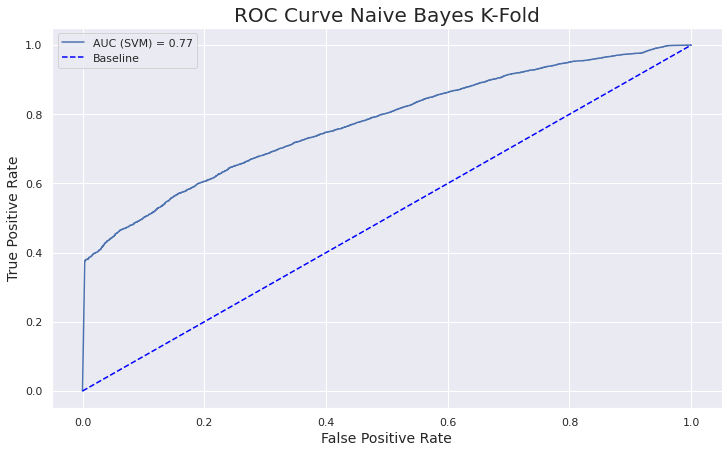

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
probs=modelnb.predict_proba(xtestfold5)[:,1]
auc = roc_auc_score(ytestfold5, probs)
fpr, tpr, threshold = roc_curve(ytestfold5, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC (SVM) = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve Naive Bayes K-Fold', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

#2. RH 

In [ ]:
#Pake data rholdout 5
modelnb=clf.fit(xtrainke5FS, ytrainke5)
y_predrh5 = clf.predict(xtestke5FS)
cmnbrh5 = confusion_matrix(ytestke5, y_predrh5)
cmnbrh5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[20530,   355],
       [ 7450,  4889]])

In [ ]:
#Cek Akurasi dan sensitifitas (recall)
print(classification_report(ytestke5, y_predrh5))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84     20885
           1       0.93      0.40      0.56     12339

    accuracy                           0.77     33224
   macro avg       0.83      0.69      0.70     33224
weighted avg       0.81      0.77      0.73     33224



In [ ]:
#Spesifisitas
FP =cmnbrh5[1,0]
TN =cmnbrh5[1,1]
specitivity = TN/(FP+TN)
specitivity

0.3962233568360483

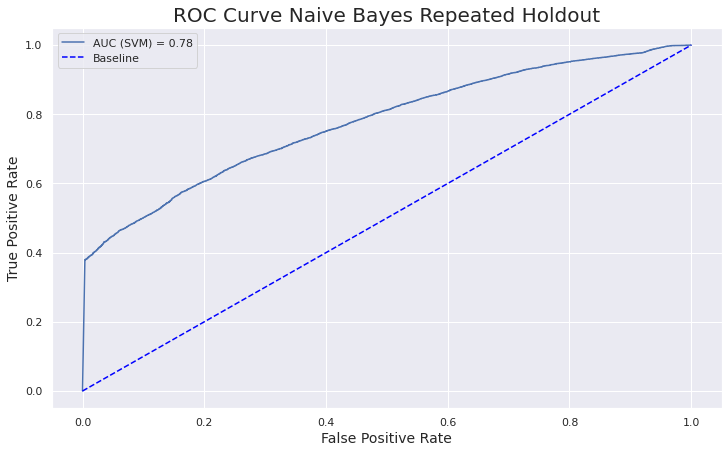

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
probs=modelnb.predict_proba(xtestke5FS)[:,1]
auc = roc_auc_score(ytestke5, probs)
fpr, tpr, threshold = roc_curve(ytestke5, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC (SVM) = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve Naive Bayes Repeated Holdout', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();


#LOGREG

#1. Kfold =*5*

In [ ]:
logreg = LogisticRegression()
modellog=logreg.fit(xtrainfold5, ytrainfold5)
y_pred = logreg.predict(xtestfold5)
cmlog=confusion_matrix(ytestfold5, y_pred)
cmlog

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[12372,  1590],
       [ 3969,  4218]])

In [ ]:
#Cek Akurasi dan sensitifitas (recall)
print(classification_report(ytestfold5, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82     13962
           1       0.73      0.52      0.60      8187

    accuracy                           0.75     22149
   macro avg       0.74      0.70      0.71     22149
weighted avg       0.75      0.75      0.74     22149



In [ ]:
#Spesifisitas
FP =cmlog[1,0]
TN =cmlog[1,1]
specitivity = TN/(FP+TN)
specitivity

0.5152070355441554

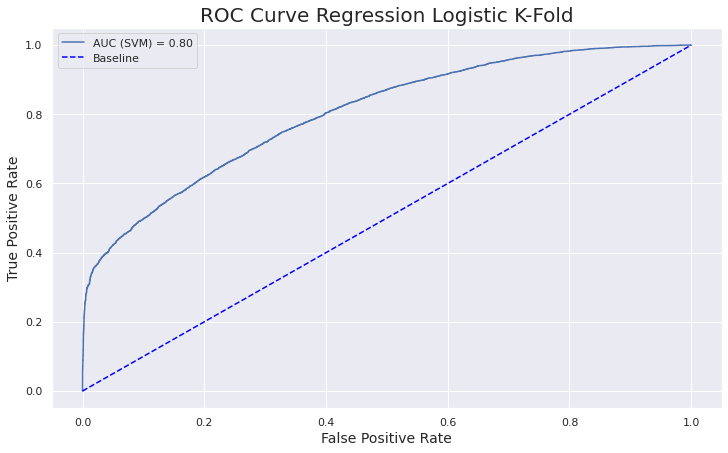

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
probs=modellog.predict_proba(xtestfold5)[:,1]
auc = roc_auc_score(ytestfold5, probs)
fpr, tpr, threshold = roc_curve(ytestfold5, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC (SVM) = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve Regression Logistic K-Fold', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

#2. RH

In [ ]:
logreg = LogisticRegression()
modellogrh=logreg.fit(xtrainke5, ytrainke5)
y_pred = logreg.predict(xtestke5)
cmlogrh=confusion_matrix(ytestke5, y_pred)
cmlogrh

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[18437,  2448],
       [ 5881,  6458]])

In [ ]:
#Cek Akurasi dan sensitifitas (recall)
print(classification_report(ytestke5, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82     20885
           1       0.73      0.52      0.61     12339

    accuracy                           0.75     33224
   macro avg       0.74      0.70      0.71     33224
weighted avg       0.75      0.75      0.74     33224



In [ ]:
#Spesifisitas
FP =cmlogrh[1,0]
TN =cmlogrh[1,1]
specitivity = TN/(FP+TN)
specitivity

0.5233811492017181

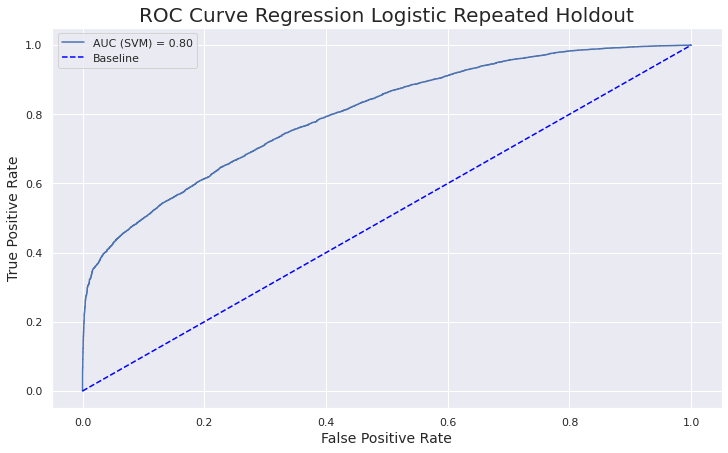

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
probs=modellogrh.predict_proba(xtestke5)[:,1]
auc = roc_auc_score(ytestke5, probs)
fpr, tpr, threshold = roc_curve(ytestke5, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC (SVM) = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve Regression Logistic Repeated Holdout', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

#Random forest

#1. kfold 5

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
modelrf=rf.fit(xtrainfold5, ytrainfold5)
y_pred = rf.predict(xtestfold5)
cmrf=confusion_matrix(ytestfold5, y_pred)
cmrf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([[12688,  1274],
       [ 1930,  6257]])

In [ ]:
#Cek Akurasi dan sensitifitas (recall)
print(classification_report(ytestfold5, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     13962
           1       0.83      0.76      0.80      8187

    accuracy                           0.86     22149
   macro avg       0.85      0.84      0.84     22149
weighted avg       0.85      0.86      0.85     22149



In [ ]:
#Spesifisitas
FP =cmrf[1,0]
TN =cmrf[1,1]
specitivity = TN/(FP+TN)
specitivity

0.7642604128496396

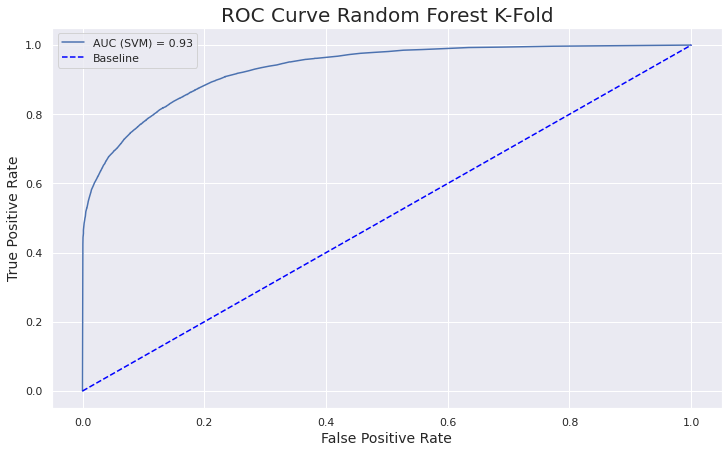

In [ ]:
probs=modelrf.predict_proba(xtestfold5)[:,1]
auc = roc_auc_score(ytestfold5, probs)
fpr, tpr, threshold = roc_curve(ytestfold5, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC (SVM) = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve Random Forest K-Fold', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

#2. Rh

In [ ]:
modelrfrh=rf.fit(xtrainke5, ytrainke5)
y_pred = rf.predict(xtestke5)
cmrfrh=confusion_matrix(ytestke5, y_pred)
cmrfrh

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


array([[19043,  1842],
       [ 3070,  9269]])

In [ ]:
#Cek Akurasi dan sensitifitas (recall)
print(classification_report(ytestke5, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     20885
           1       0.83      0.75      0.79     12339

    accuracy                           0.85     33224
   macro avg       0.85      0.83      0.84     33224
weighted avg       0.85      0.85      0.85     33224



In [ ]:
#Spesifisitas
FP =cmrfrh[1,0]
TN =cmrfrh[1,1]
specitivity = TN/(FP+TN)
specitivity

0.7511953967096199

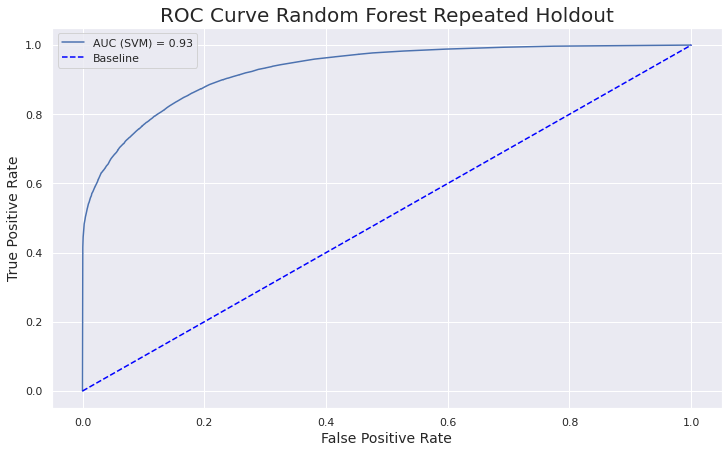

In [ ]:
probs=modelrfrh.predict_proba(xtestke5)[:,1]
auc = roc_auc_score(ytestke5, probs)
fpr, tpr, threshold = roc_curve(ytestke5, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC (SVM) = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve Random Forest Repeated Holdout', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

#KNN

#1 kfold5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
modelknn=knn.fit(xtrainfold5, ytrainfold5)
y_predknn = knn.predict(xtestfold5)
#acc_knn = accuracy_score(y_test, y_pred_knn)
cmknn = confusion_matrix(ytestfold5, y_predknn)
#clf_report = classification_report(y_test, y_pred_knn)
#print(f"Accuracy Score of KNN is : {acc_knn}")
#print(f"Confusion Matrix : n{conf}")
#print(f"Classification Report : n{clf_report}")
cmknn

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[12172,  1790],
       [ 2702,  5485]])

In [ ]:
#Cek Akurasi dan sensitifitas (recall)
print(classification_report(ytestfold5, y_predknn))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84     13962
           1       0.75      0.67      0.71      8187

    accuracy                           0.80     22149
   macro avg       0.79      0.77      0.78     22149
weighted avg       0.79      0.80      0.79     22149



In [ ]:
#Spesifisitas
FP =cmknn[1,0]
TN =cmknn[1,1]
specitivity = TN/(FP+TN)
specitivity

0.6699645779894955

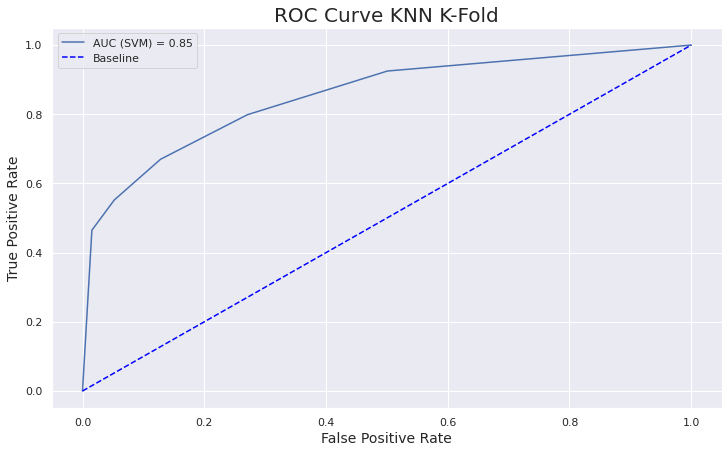

In [ ]:
probs=modelknn.predict_proba(xtestfold5)[:,1]
auc = roc_auc_score(ytestfold5, probs)
fpr, tpr, threshold = roc_curve(ytestfold5, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC (SVM) = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve KNN K-Fold', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

#2. rh

In [ ]:
modelknnrh=knn.fit(xtrainke5, ytrainke5)
y_predknn = knn.predict(xtestke5)
cmknnrh = confusion_matrix(ytestke5, y_predknn)
cmknnrh

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[18271,  2729],
       [ 4012,  8212]])

In [ ]:
#Cek Akurasi dan sensitifitas (recall)
print(classification_report(ytestke5, y_predknn))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84     21000
           1       0.75      0.67      0.71     12224

    accuracy                           0.80     33224
   macro avg       0.79      0.77      0.78     33224
weighted avg       0.79      0.80      0.79     33224



In [ ]:
#Spesifisitas
FP =cmknnrh[1,0]
TN =cmknnrh[1,1]
specitivity = TN/(FP+TN)
specitivity

0.6717931937172775

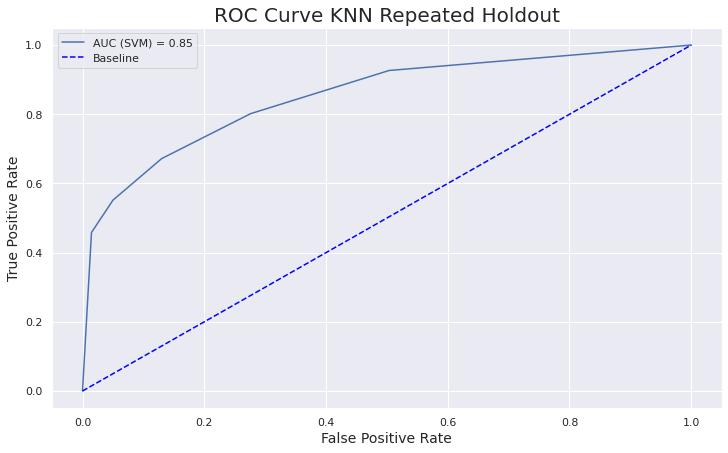

In [ ]:
probs=modelknnrh.predict_proba(xtestke5)[:,1]
auc = roc_auc_score(ytestke5, probs)
fpr, tpr, threshold = roc_curve(ytestke5, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC (SVM) = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve KNN Repeated Holdout', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();